In [1]:
from keras.utils import plot_model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Input
from keras.models import Model
from keras.layers.merge import concatenate

In [3]:
giris=Input(shape=(64,64,1))

In [7]:
# 1. katman

con1=Conv2D(32,kernel_size=4,activation="relu")(giris)
pool1=MaxPooling2D(pool_size=(2,2))(con1)
flat1=Flatten()(pool1)

# 2. katman

con2=Conv2D(16,kernel_size=8,activation="relu")(giris)
pool2=MaxPooling2D(pool_size=(2,2))(con2)
flat2=Flatten()(pool2)

#birleştirme katmanı

concat=concatenate([flat1,flat2])
hidden=Dense(10,activation="relu")(concat)

#çıkış katmanı

output=Dense(1,activation="sigmoid")(hidden)

In [8]:
model=Model(inputs=giris,outputs=output)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 61, 61, 32)   544         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 57, 57, 16)   1040        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 30, 30, 32)   0           conv2d_4[0][0]                   
_______________________________________________________________________________________

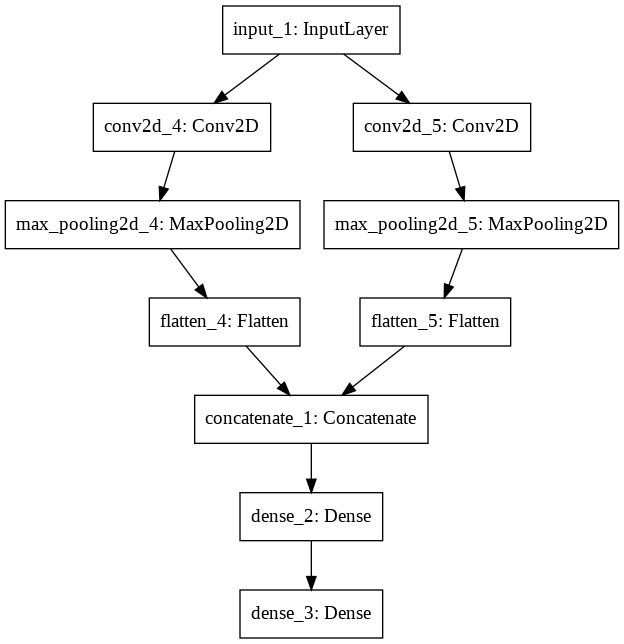

In [9]:
plot_model(model,to_file="model.png")